Exploratory Data Analysis (EDA) Project Guide
I'd be happy to guide you through an EDA project step by step. Let's structure this properly to ensure you get the most value from your project.

Step 1: Project Selection
First, let's choose one of the datasets you mentioned. For this guide, I'll use the McDonald's Nutrition Facts dataset as an example, but the same principles apply to any dataset.

Why McDonald's Nutrition?
It's relatable (most people are familiar with McDonald's)
Contains multiple nutritional dimensions to explore
Good for practicing different visualization techniques


Step 2: Setting Up Your Environment
Tools you'll need:
Python (3.7 or higher recommended)
jupyter Notebook (or JupyterLab/VS Code)
Required libraries:  pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mcd.csv')  # Adjust filename as needed

In [3]:
# Initial inspection
df.head()  # First few rows

df.info() # Data types and non-null counts
df.describe()  # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          42 non-null     object 
 1   serving_size  42 non-null     object 
 2   ingredients   36 non-null     object 
 3   tag           36 non-null     object 
 4   allergy       42 non-null     object 
 5   energy        42 non-null     float64
 6   protein       42 non-null     float64
 7   total_fat     42 non-null     float64
 8   sat_fat       42 non-null     float64
 9   trans_fat     42 non-null     float64
 10  chol          42 non-null     float64
 11  carbs         42 non-null     float64
 12  total_sugar   42 non-null     float64
 13  added_sugar   42 non-null     float64
 14  sodium        42 non-null     float64
 15  description   42 non-null     object 
dtypes: float64(10), object(6)
memory usage: 5.4+ KB


,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,327.503810,10.251667,13.980095,6.457143,0.125238,21.062619,39.231857,13.296905,9.305714,474.297857
std,206.453133,10.042711,11.748440,5.208211,0.111994,28.125409,21.680327,14.939201,12.297709,472.896404
min,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
25%,176.622500,2.832500,5.790000,3.670000,0.060000,2.840000,23.632500,2.922500,1.080000,85.770000
50%,306.245000,6.335000,11.375000,5.065000,0.100000,6.585000,39.305000,8.565000,5.175000,309.770000
75%,401.737500,15.340000,18.807500,8.125000,0.175000,31.740000,51.207500,17.287500,12.902500,709.437500
max,832.670000,47.600000,46.900000,21.110000,0.590000,115.000000,117.780000,66.930000,55.160000,1854.710000


What to look for:
Data types of each column
Missing values
Basic statistics (mean, min, max)
Number of rows and columns

Step 4: Data Cleaning

In [4]:
# Check for missing values
df.isnull().sum()

# Handle missing data (example)
# df = df.dropna()  # If you want to remove rows with missing values
# OR
# df['column'] = df['column'].fillna(df['column'].mean())  # Fill with mean

# Check for duplicates
df.duplicated().sum()

0

Step 3: Univariate Analysis
Nutritional Distribution Analysis

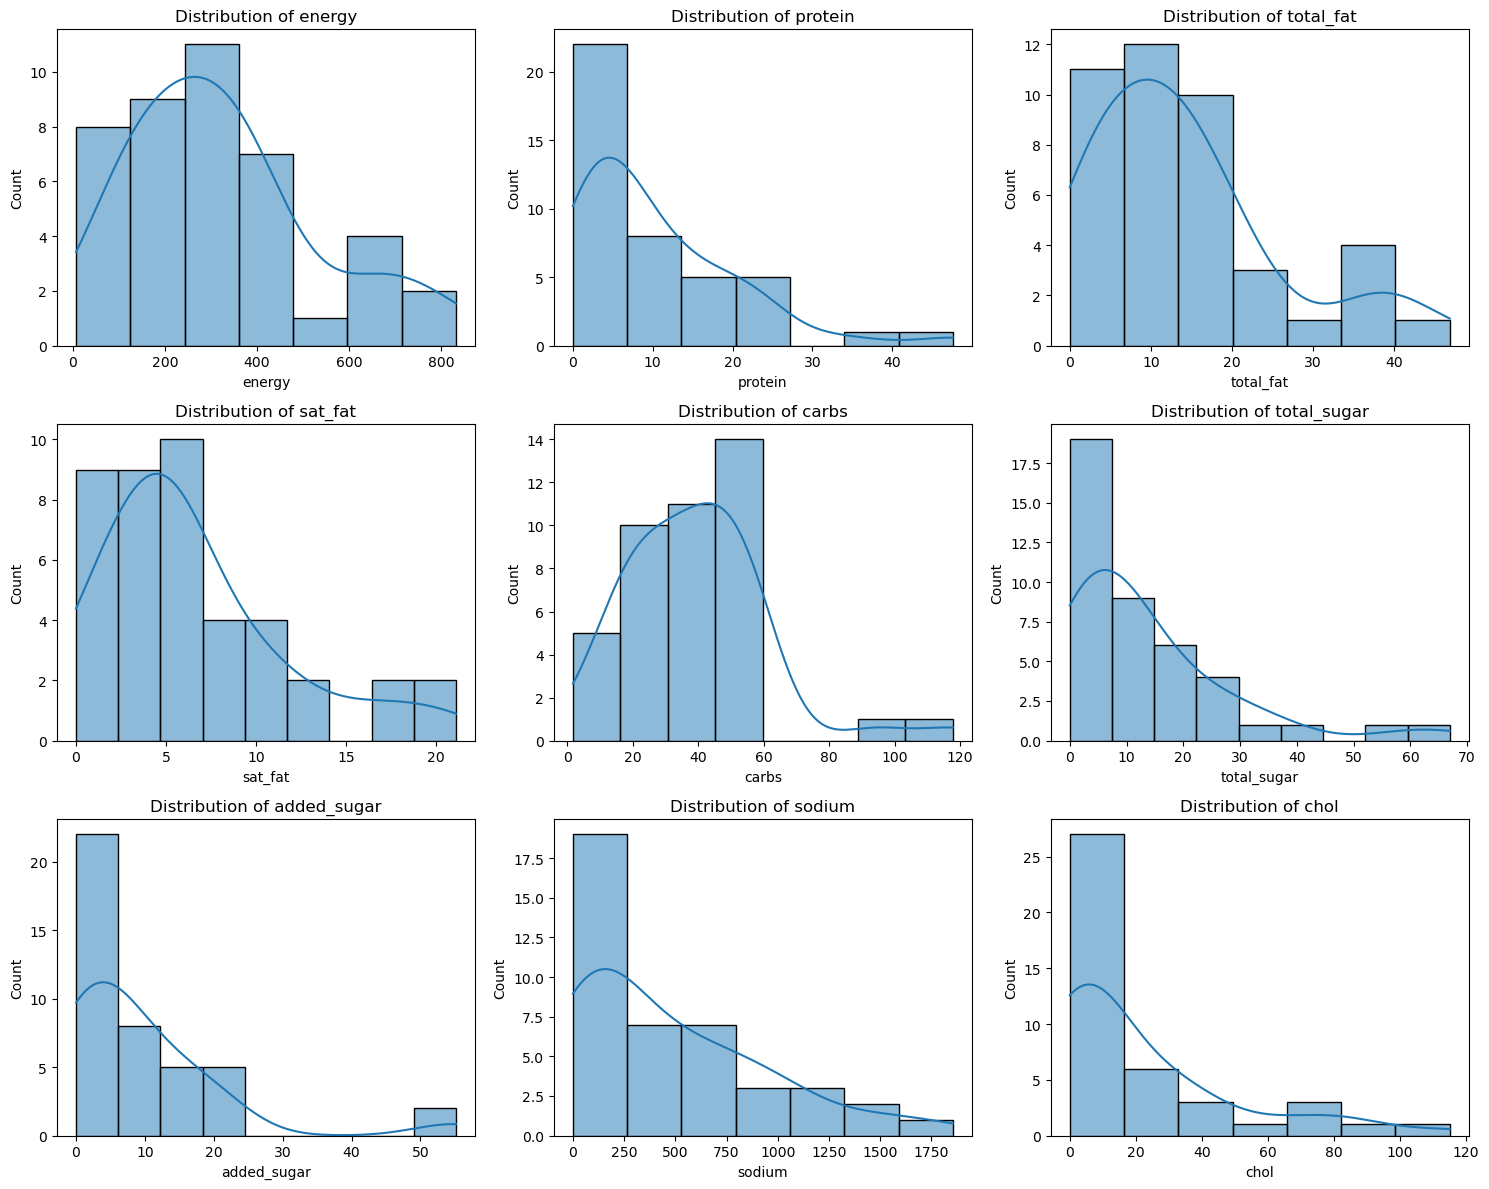

In [6]:
# Select key nutritional columns
nutr_cols = ['energy', 'protein', 'total_fat', 'sat_fat', 'carbs', 
             'total_sugar', 'added_sugar', 'sodium', 'chol']

# Plot distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(nutr_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Key Findings:
Energy ranges from 6.8 (black coffee) to 832.67 kcal (Veg Maharaja Mac)
Most items have 10-20g protein, with some outliers (Chicken Maharaja Mac has 34g)
Sodium content varies widely (0mg to 1854mg)

Step 4: Bivariate Analysis
Energy vs Macronutrients

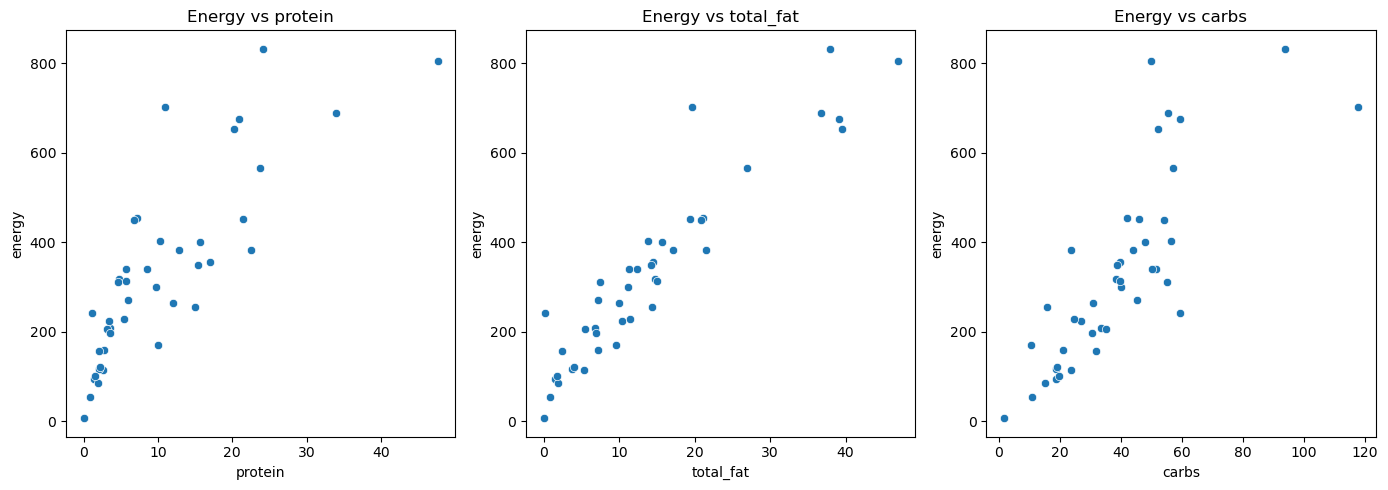

In [7]:
# Scatter plots of energy vs macronutrients
macronutrients = ['protein', 'total_fat', 'carbs']
plt.figure(figsize=(14, 5))
for i, nutrient in enumerate(macronutrients, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=nutrient, y='energy')
    plt.title(f'Energy vs {nutrient}')
plt.tight_layout()
plt.show()

Observations:
Strong positive correlation between energy and total fat
Protein shows moderate correlation with energy
Carbs show more variability in their relationship to energy

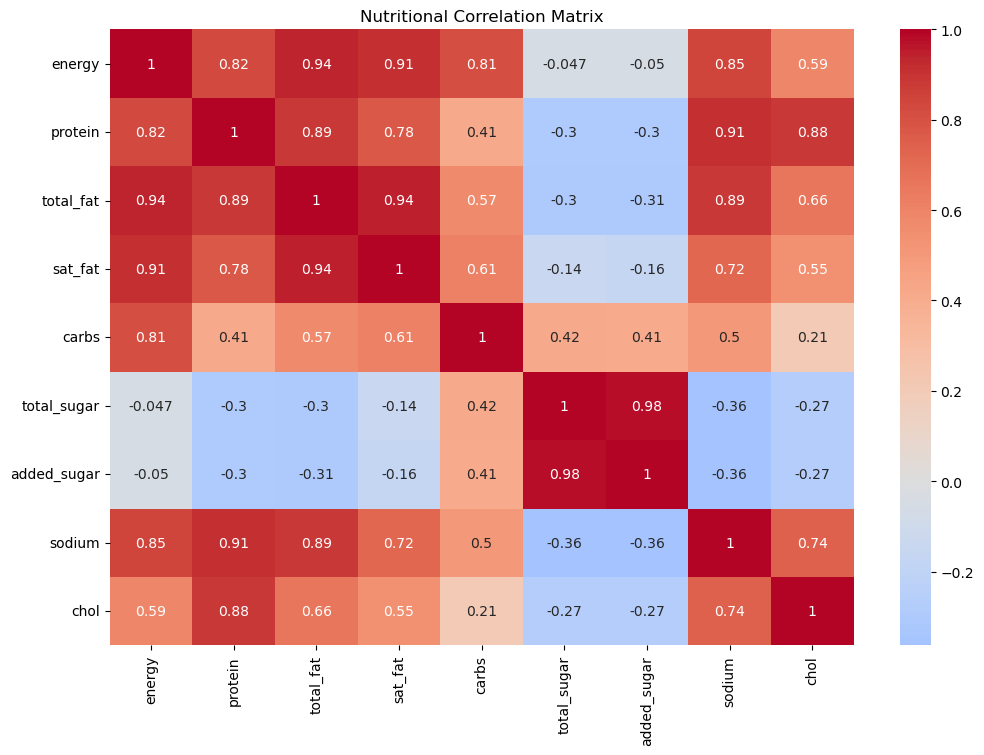

In [11]:
#Correlation matrix 
corr = df[nutr_cols].corr ()

#Plot Heatmap 
plt.figure(figsize=(12,8)) 
sns.heatmap(corr , annot = True , cmap = 'coolwarm', center= 0 )
plt.title('Nutritional Correlation Matrix')
plt.show()

Key Correlations:
Energy strongly correlates with total fat (0.91) and saturated fat (0.89)
Sodium also highly correlates with energy (0.83)
Sugar content shows weaker correlations with other nutrients

Step 5: Category Analysis
Create Food Categories

In [12]:
# Create broader categories
def categorize_item(name):
    name = name.lower()
    if 'burger' in name: return 'Burger'
    if 'wrap' in name: return 'Wrap'
    if 'mcnuggets' in name: return 'Chicken Nuggets'
    if 'fries' in name: return 'Fries'
    if 'mcflurry' in name or 'sundae' in name or 'soft serve' in name: return 'Dessert'
    if 'coffee' in name or 'tea' in name or 'chai' in name: return 'Beverage'
    return 'Other'

df['category'] = df['name'].apply(categorize_item)

Nutritional Comparison by Category

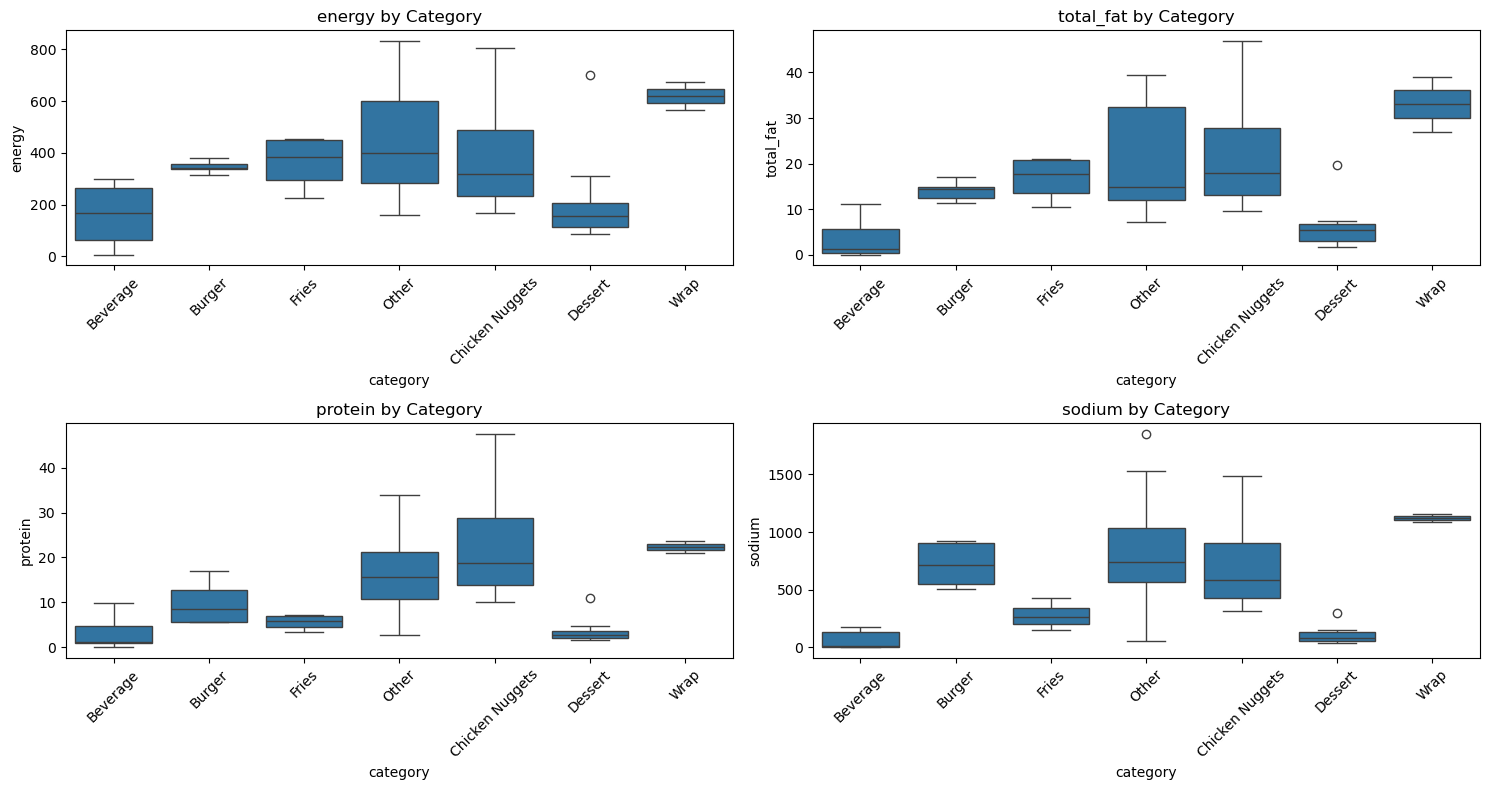

In [14]:
# Boxplots by category
plt.figure(figsize=(15, 8))
for i, col in enumerate(['energy', 'total_fat', 'protein', 'sodium'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='category', y=col)
    plt.title(f'{col} by Category')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Category Insights:
Burgers & Wraps: Highest in energy, fat, and sodium
Desserts: Highest in sugar content
Beverages: Lowest in most metrics except sugar (for sweet drinks)
Fries: Moderate energy but low protein

Step 6: Allergen Analysis

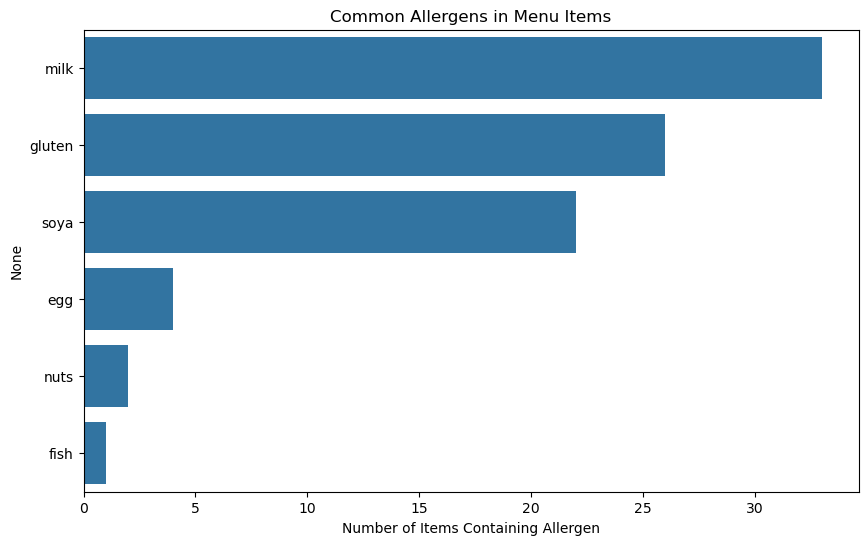

In [15]:
# Analyze allergen information
allergens = ['gluten', 'milk', 'soya', 'egg', 'fish', 'nuts']
for allergen in allergens:
    df[allergen] = df['allergy'].str.contains(allergen, case=False)

# Count items containing each allergen
allergen_counts = df[allergens].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=allergen_counts.values, y=allergen_counts.index)
plt.title('Common Allergens in Menu Items')
plt.xlabel('Number of Items Containing Allergen')
plt.show()

Allergen Findings:
Milk is the most common allergen (22 items)
Soya and gluten are also very common (21 items each)
Only a few items contain fish (1) or nuts (3)

In [ ]:
tep 7: Advanced Visualizations
Pairplot of Key Nutrients

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='category', y='total_sugar')
plt.title('Sugar Content Distribution by Category')
plt.xticks(rotation=45)
plt.show


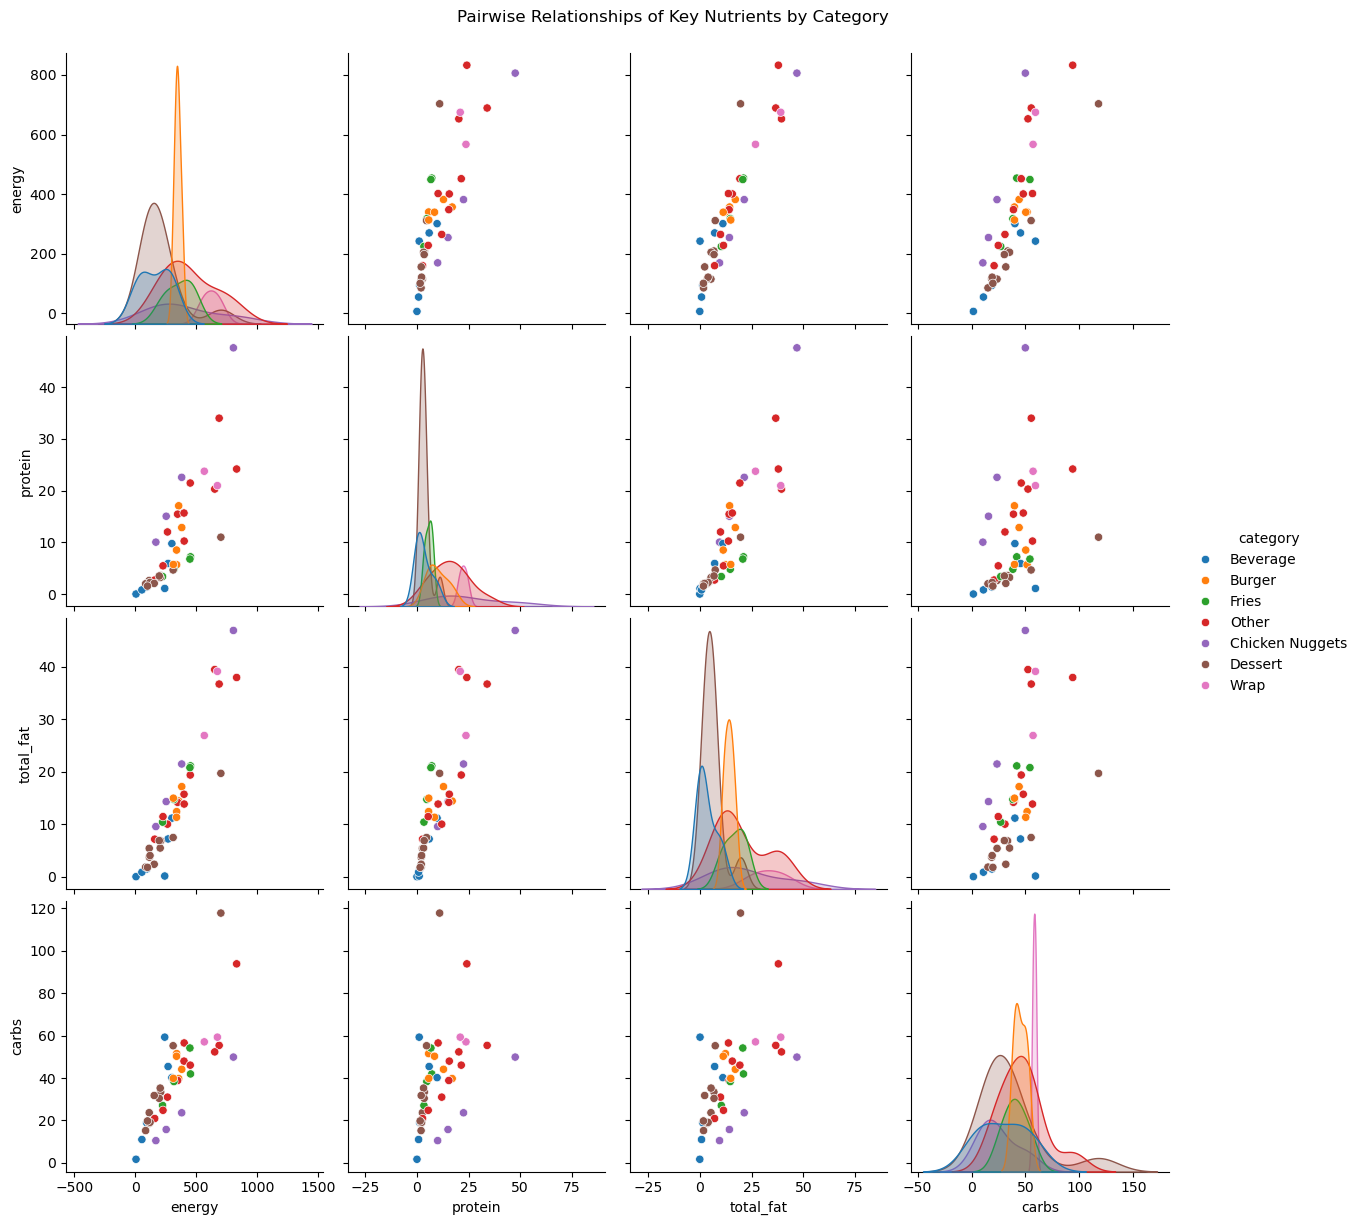

In [18]:
sns.pairplot(df[['energy', 'protein', 'total_fat', 'carbs', 'category']], 
             hue='category', height=3)
plt.suptitle('Pairwise Relationships of Key Nutrients by Category', y=1.02)
plt.show()

Violin Plots for Nutrient Distributions

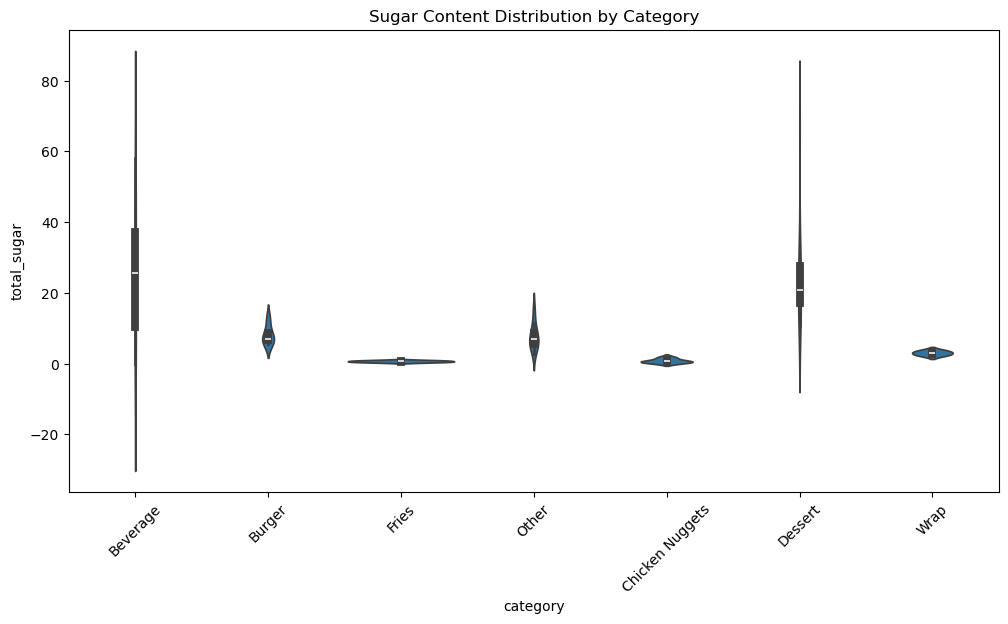

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='category', y='total_sugar')
plt.title('Sugar Content Distribution by Category')
plt.xticks(rotation=45)
plt.show()

Step 7: Key Insights and Recommendations
Highest Calorie Items:

Veg Maharaja Mac (832 kcal)
Chicken Maharaja Mac (689 kcal)
Spicy Paneer Wrap (674 kcal)
Healthier Choices:
Black Coffee (6.8 kcal)
Masala Chai (55-94 kcal)
Soft Serve Cone (86 kcal)

Allergen Awareness:
61% of items contain milk
58% contain soya
Only 3 items contain nuts (all desserts)
Sugar Content:
Highest in desserts and sweet beverages
Iced Tea has 58g total sugar (400ml serving)

Sodium Watchouts:
Veg Maharaja Mac (1529mg)
Chicken Maharaja Mac (1854mg)
Spicy Chicken Wrap (1152mg)

Further Analysis Ideas:
Compare different serving sizes of the same item
Analyze the relationship between price and nutrition (if price data available)
Create a "health score" based on nutritional values
Compare vegetarian vs non-vegetarian items
Analyze ingredient lists for common patterns